In [2]:
import numpy as np
from game import *
from q_learning import q_learning, double_q_learning
from sarsa import sarsa



In [18]:
from utils import *
import pandas as pd
# hyperparameter tuning for sarsa (manual grid search)
env = MDPGame(random_x=True)
env.load_level(long_level)

episode_values = [2000, 3000, 4000, 5000]
alpha_values = [0.05, 0.1, 0.15, 0.2, 0.25]
gamma_values = [0.9, 0.95, 0.98, 0.99, 0.999]
epsilon_values = [0.05, 0.1, 0.125, 0.15, 0.2]
n = 5

results = []
for alpha in alpha_values:
    for gamma in gamma_values:
        for epsilon in epsilon_values:
            for episodes in episode_values:
                result = 0
                for _ in range(n):
                    Q = sarsa(env, episodes, alpha, gamma, epsilon)
                    pi = Q_to_policy(Q, env)
                    result += test_policy(pi, env, silent=True)
                results.append([episodes, alpha, gamma, epsilon, result/n])

df = pd.DataFrame(results, columns=["episodes", "alpha", "gamma", "epsilon", "pass_rate"])


In [19]:
filtered_best = df[df["pass_rate"] > 0.99]
filtered_best = filtered_best[filtered_best['episodes']==filtered_best['episodes'].min()]
filtered_best


,episodes,alpha,gamma,epsilon,pass_rate
106,4000,0.10,0.900,0.100,1.0
146,4000,0.10,0.980,0.100,1.0
190,4000,0.10,0.999,0.125,1.0
194,4000,0.10,0.999,0.150,1.0
274,4000,0.15,0.990,0.150,1.0
294,4000,0.15,0.999,0.150,1.0
358,4000,0.20,0.980,0.200,1.0
454,4000,0.25,0.980,0.150,1.0
474,4000,0.25,0.990,0.150,1.0


/tmp/ipykernel_10674/3559637839.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='episodes', y='pass_rate', hue='alpha', marker='o', palette='viridis', ci=None)


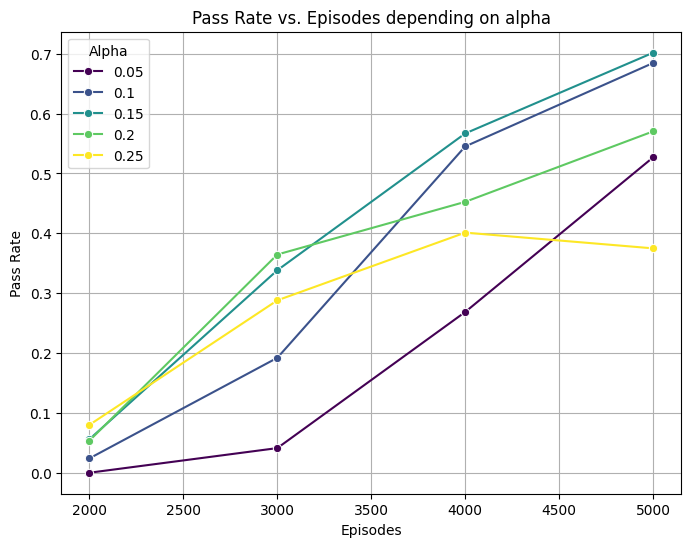

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='episodes', y='pass_rate', hue='gamma', marker='o', palette='viridis', ci=None)

plt.xlabel('Episodes')
plt.ylabel('Pass Rate')
plt.title('Pass Rate vs. Episodes depending on alpha')
plt.legend(title='Alpha')
plt.grid(True)
plt.show()
